In [1]:
# PURPOSE
# The pourpose of this jupyter notebook is to put into relation the different csv files related to te DAANMO project in order to find the answers to the target questions.

# LIBRARIES
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
# CSVs
links = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\links_ready.csv')
links_small = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\links_small_ready.csv')
keywords = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\keywords_ready.csv')
actors = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\actors_ready.csv')
producers = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\producers_ready.csv')
directors = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\directors_ready.csv')
genres_unique = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\genres_unique_ready.csv')
genres = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\ready_dfs\genres_ready.csv')

print("csvs ready")

csvs ready


In [3]:
# the links df will be used in case any other df of this notebook has NaN values in the "id" section. With the hope to cover this gaps and avoid an unnecessary loss of data.
links.isnull().any()

movieId    False
imdbId     False
tmdbId     False
dtype: bool

# Related to actors, directors and producers

The questions raised in the introductory document about the data related to actors, directors and producers (all three groups shall be named participants to allow an easier reading) where:
    
    1) Can it be determined the relationship between participants and the movie's profit, in order to obtain the most bankable star.
        - This includes both popularity and profitablility

    2) Wich actors participants most in the different genres (typecasting).

In order to answer this questions, firtstly the participants csv will be explored in order to determine the gender ratio of its population. Secondly it will be merged with the Links csv, then with the corresponding csvs. Finally the analysis will be presented.

1. Male and Female actors ratio:

In [4]:
gender_roles = pd.DataFrame(actors[['credits_order', 'gender']])

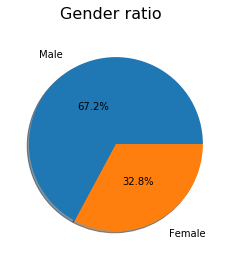

In [5]:
gender_count = gender_roles.gender.value_counts()
labels = 'Male', 'Female'
explode = 0, 0

plt.pie(gender_count,  autopct='%1.1f%%', startangle=0, explode= explode, labels= labels, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Gender ratio', fontsize=16)

plt.show()

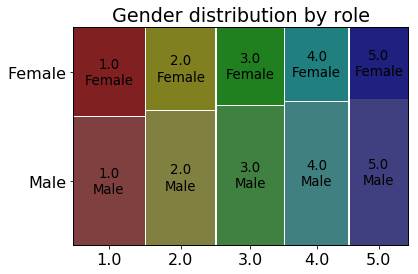

In [6]:
plt.rcParams['font.size'] = 16.0
mosaic(gender_roles.loc[gender_roles.credits_order <= 5], ['credits_order', 'gender'],title='Gender distribution by role');

As the mosaic grpah shows, the number of male actors is superior to their correspondant female counterparts. It is also notable that the diference increases as we progress through the credits.

This is indicative of a missrepresentation of women across the differente film genres. Thus it becomes necessary to further explore this difference and see how it affects the rest of the data. For readabiliy reasons, a top number of 20 has been selected to determine the roles to investigate. This is motivated by the fact that as the focus moves away from the top of the list (1st billing), the importance of the role diminishes. And with importance comes screen-time, plot-interference and number of lines.

In [7]:
stage1 = gender_roles.groupby('credits_order').gender.value_counts().head(40)
stage1 = list(stage1)

male = []
female = []

for n in range(len(stage1)):
    if (n % 2) == 0:
        male.append(stage1[n])
    else:
        female.append(stage1[n])
print ("Done")

Done


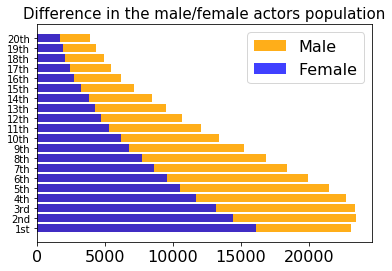

In [8]:
# Data assembly
objects = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th','9th', '10th', '11th','12th', '13th', '14th', '15th', '16th', '17th', '18th','19th', '20th']
y_pos = np.arange(len(objects))
data = male
data2 = female

# Creating the plots
plt.barh(y_pos, data, align='center', alpha=0.9, color= 'orange')
plt.barh(y_pos, data2, align='center', alpha=0.75, color= 'blue')
plt.yticks(y_pos, objects, fontsize=10)


# Cretaing labels and titles
plt.title('Difference in the male/female actors population', fontsize=15)
plt.legend(labels, loc= 'best')


plt.show()

As shown before, a clear missrepresentation of women occurs across the credits. This difference is most notable, and more important, the closer the data is to the top billing (1st). As stated before, the gender ratio difference exists and is notable all across the whole spectrum of roles.


It is expected that an even wider difference might occur when taking into account the different film genres identified.

1.1 Gender across film genres

In [9]:
dfgu = genres_unique            # for easier typing, genres_unique will be renamed to dfgu

In [10]:
genres.head(1), actors.head(1)

(   Unnamed: 0   id                     genres
 0           0  862  Animation, Comedy, Family,
    Unnamed: 0  starring_role  credits_order       name gender
 0           1            862            1.0  Tim Allen   Male)

In [16]:
#  No NaN data in "id" columns
genres.id.isnull().any(), actors.starring_role.isnull().any()

(False, False)

In [123]:
prueba1 = pd.DataFrame({'id': [862, 1004, 804], 'genre': [['animation', 'scifi'], 'drama', ['animation', 'drama']]})
prueba2 = pd.DataFrame({'id':[862, 862, 862, 1004, 804, 804], 'gender': ['male', 'male', 'female', 'female', 'female', 'female']})
prueba3 = pd.DataFrame({'genre':['animation', 'drama', 'scifi']})
 
prueba1

,id,genre
0,862,"[animation, scifi]"
1,1004,drama
2,804,"[animation, drama]"


In [13]:
for e in prueba1['id']:
    if e in list(prueba2['id']):
        print (e)

862
804


In [159]:
def cross_indexer (df1, df2, df3):
    def ident_creator (df1):
        ident = []
        for e in df1.index:
            i = df1.loc[e, 'id']
            ident.append(i)
        return ident

    def gender_search (df1, df2, ident):
        for i in ident:
            if i in list(df2['id']):            
                gender_k = list(df2.loc[df2['id'] == i].gender.value_counts().keys())
                gender_v = list(df2.loc[df2['id'] == i].gender.value_counts())
        print ('genders still WIP')
                
    def genre_search (df1, ident):
        genre_list = []
        for i in ident:
            if i in list(df2['id']):
                genres = list(df1['genre'].loc[df1['id'] == i])
                genres = genres[0]                                # This needs to be in order to take the embeded lists for the loop
                genre_list.append(genres)
        
        return genre_list

    def gender_genre_counter (df3, ident, genre_list):
        for i in range(len(ident)):
            if type(genre_list[i]) == list:
                for e in genre_list[i]:
                    print (e)
            else:
                print (genre_list[i])


    ident = ident_creator(df1)
    gender_search(df1, df2, ident)
    genre_list = genre_search (df1, ident)
    gender_genre_counter (df1, ident, genre_list)
cross_indexer (prueba1, prueba2, prueba3)

genders still WIP
animation
scifi
drama
animation
drama
